In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

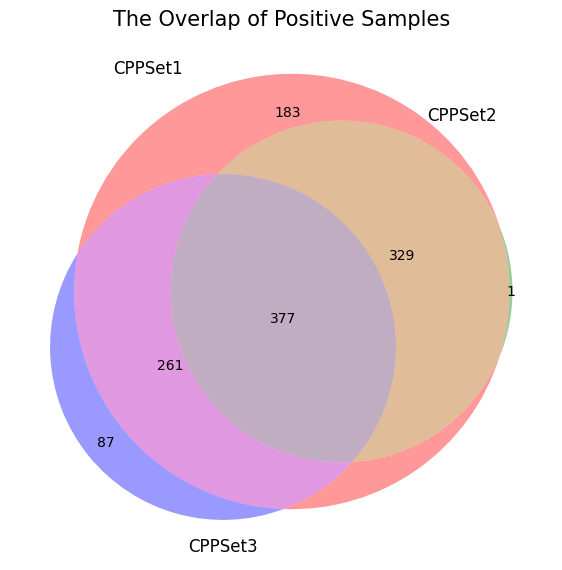

<Figure size 640x480 with 0 Axes>

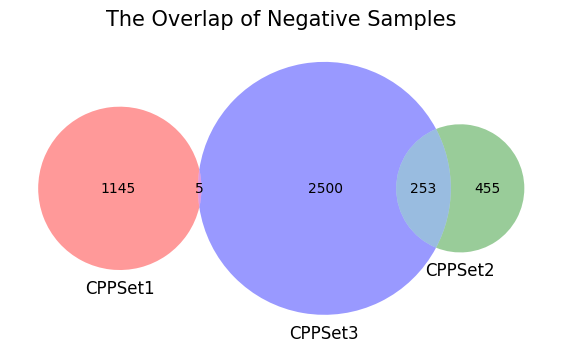

<Figure size 640x480 with 0 Axes>

In [2]:
def read_csv_file(csv_file):
    df = pd.read_csv(csv_file)
    pos_df = df[df['Label'] == 1]
    neg_df = df[df['Label'] == 0]
    return df, pos_df, neg_df


def get_sequence_sets(pos_df, neg_df):
    pos_set = set(pos_df['Sequence'].unique().tolist())
    neg_set = set(neg_df['Sequence'].unique().tolist())
    return pos_set, neg_set


def plot_venn(sets, labels, title, output_filename):
    """
    This function creates a Venn diagram for three sets and saves it as a PDF.

    Parameters:
    - sets: A list of three sets to be used for the Venn diagram.
    - labels: A tuple of three labels for the sets.
    - title: The title of the Venn diagram.
    - output_filename: The name of the output PDF file.
    """
    # Create the Venn diagram
    plt.figure(figsize=(7,7))
    venn3(sets, labels)
    
    # Set the title and save the figure
    plt.title(title, fontsize=15)
    plt.savefig(output_filename, bbox_inches='tight', format='pdf', dpi=600)
    plt.show()
    plt.clf()


#### Step1: Read three dataset
set1_df, pos_set1_df, neg_set1_df = read_csv_file('CPPSet1.csv')
set2_df, pos_set2_df, neg_set2_df = read_csv_file('CPPSet2.csv')
set3_df, pos_set3_df, neg_set3_df = read_csv_file('CPPSet3.csv')
set4_df = pd.read_csv('CPPSet4.txt')
pos_set4_df = set4_df
neg_set4_df = pd.DataFrame(columns=['Sequence'])

#### Step2: Plotting overlap
pos_set1, neg_set1 = get_sequence_sets(pos_set1_df, neg_set1_df)
pos_set2, neg_set2 = get_sequence_sets(pos_set2_df, neg_set2_df)
pos_set3, neg_set3 = get_sequence_sets(pos_set3_df, neg_set3_df)


#### Step3: Plot positive and negative sample Venn diagrams
plot_venn([pos_set1, pos_set2, pos_set3], ('CPPSet1', 'CPPSet2', 'CPPSet3'), "The Overlap of Positive Samples", 'Positive_Overlap.pdf')
plot_venn([neg_set1, neg_set2, neg_set3], ('CPPSet1', 'CPPSet2', 'CPPSet3'), "The Overlap of Negative Samples", 'Negative_Overlap.pdf')

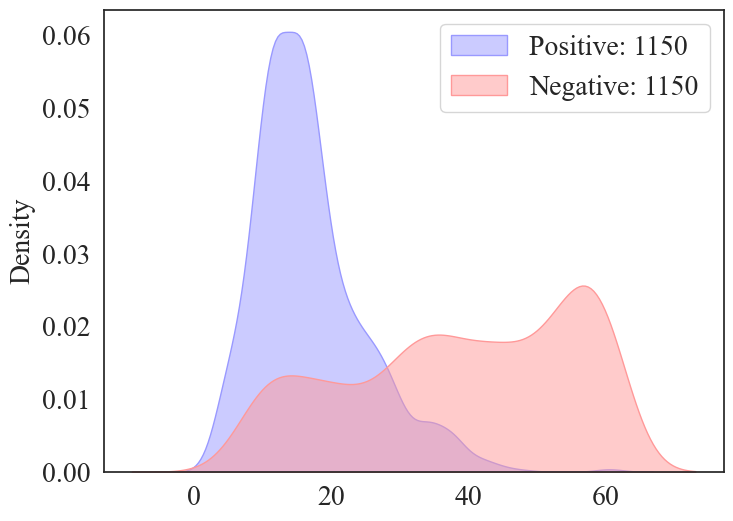

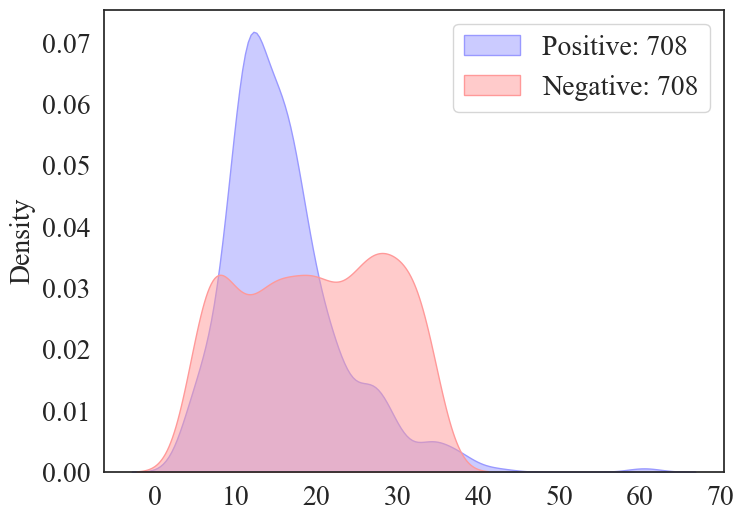

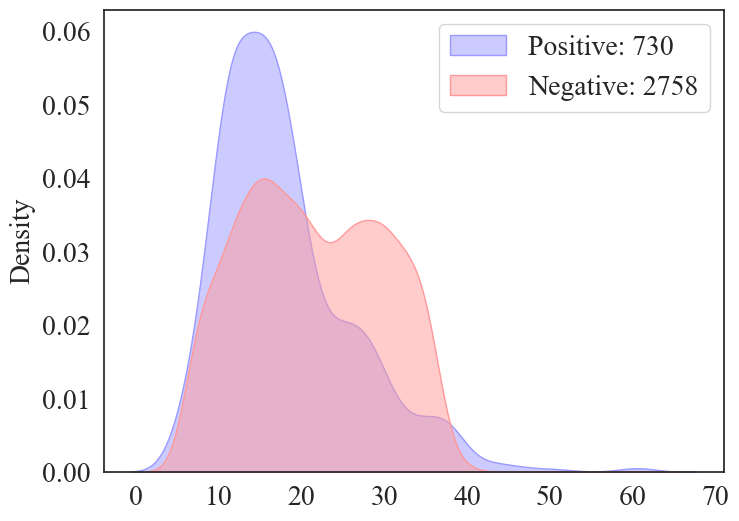

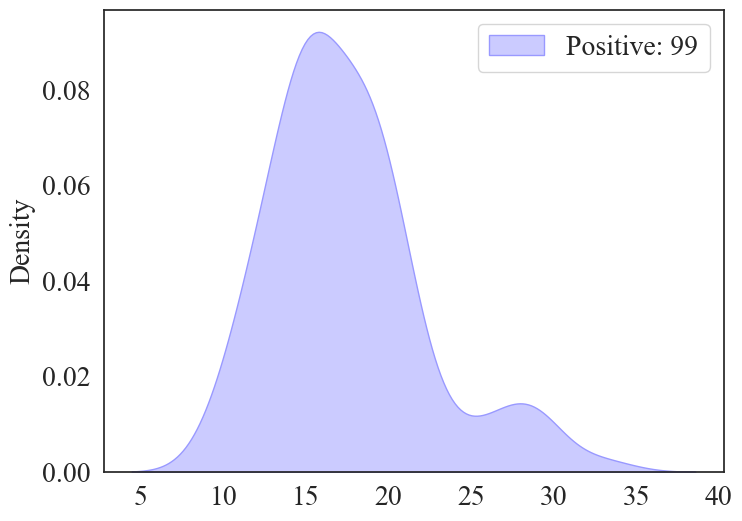

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_density(pos_len, neg_len, dataset_name, output_filename):
    """
    This function generates a density plot for positive and negative sequence lengths.

    Parameters:
    - pos_len: List of positive sequence lengths.
    - neg_len: List of negative sequence lengths.
    - dataset_name: The name of the dataset (e.g., "CPPSet1").
    - output_filename: The name of the output PDF file.
    """
    # Calculate the number of positive and negative sequences
    pos_label = len(pos_len)
    neg_label = len(neg_len)
    
    # Set style for the plot
    sns.set(style="white")
    
    plt.rc("font", family='Times New Roman')
    # Create the plot
    plt.figure(figsize=(8, 6))
    sns.kdeplot(pos_len, color="#9999FF", fill=True, alpha=0.5, label=f"Positive: {pos_label}")
    sns.kdeplot(neg_len, color="#FF9999", fill=True, alpha=0.5, label=f"Negative: {neg_label}")
    
    # Set title and labels
    # plt.title(f"{dataset_name}: {pos_label + neg_label} sequences", fontsize=16)
    # plt.xlabel("Sequence Length", fontsize=16)
    plt.ylabel("Density", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=20)
    
    # Save the plot
    plt.savefig(output_filename, bbox_inches='tight', format='pdf', dpi=600)
    plt.show()


plot_density(
    pos_len=[len(item) for item in pos_set1_df['Sequence'].to_list()],
    neg_len=[len(item) for item in neg_set1_df['Sequence'].to_list()],
    dataset_name="CPPSet1",
    output_filename='CPPSet1_Distribution.pdf'
)

plot_density(
    pos_len=[len(item) for item in pos_set2_df['Sequence'].to_list()],
    neg_len=[len(item) for item in neg_set2_df['Sequence'].to_list()],
    dataset_name="CPPSet2",
    output_filename='CPPSet2_Distribution.pdf'
)

plot_density(
    pos_len=[len(item) for item in pos_set3_df['Sequence'].to_list()],
    neg_len=[len(item) for item in neg_set3_df['Sequence'].to_list()],
    dataset_name="CPPSet3",
    output_filename='CPPSet3_Distribution.pdf'
)

plot_density(
    pos_len=[len(item) for item in pos_set4_df['Sequence'].to_list()],
    neg_len=[len(item) for item in neg_set4_df['Sequence'].to_list()],
    dataset_name="CPPSet4",
    output_filename='CPPSet4_Distribution.pdf'
)

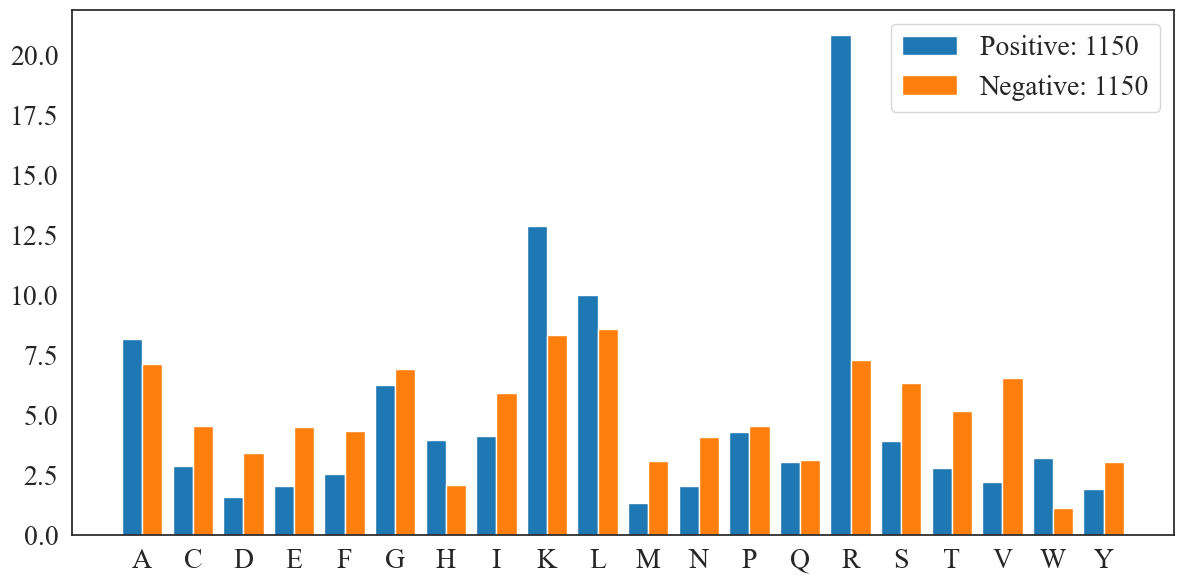

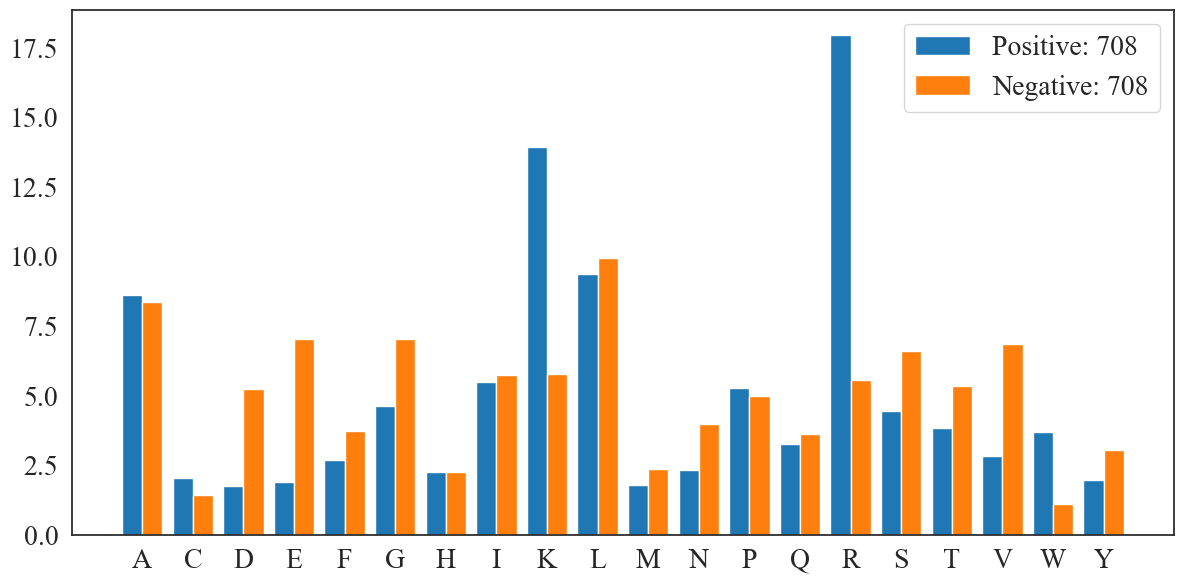

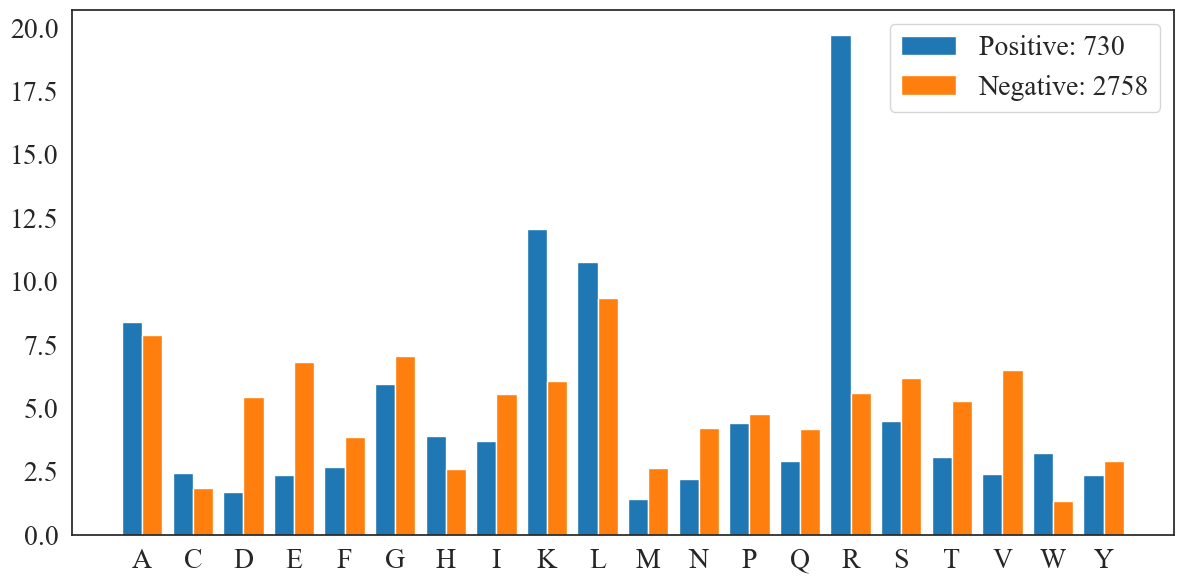

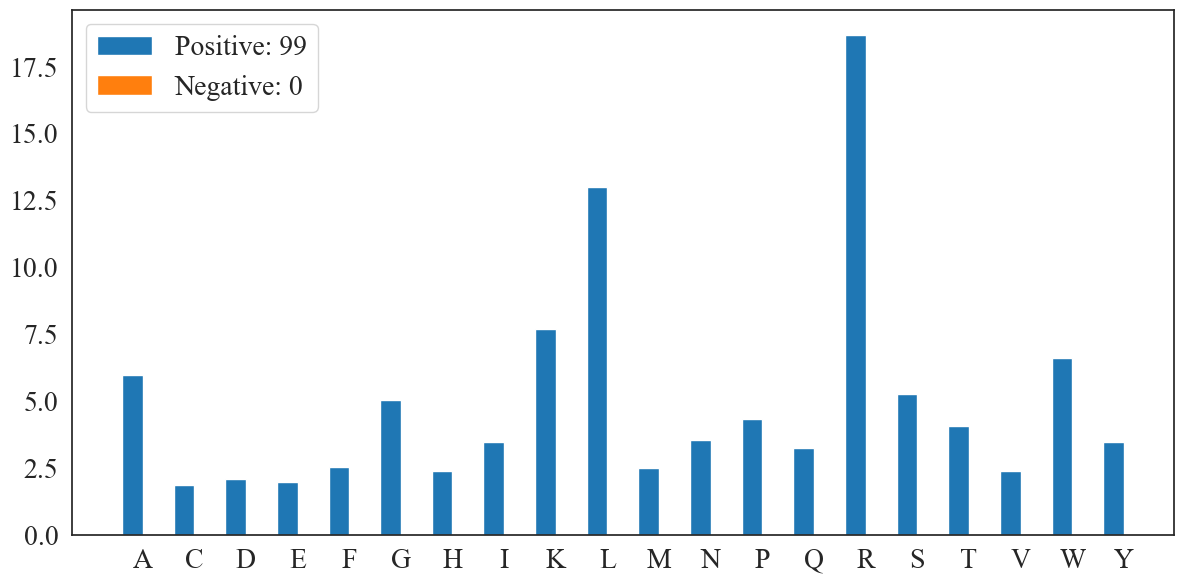

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib
import numpy as np

# Define a function to calculate amino acid proportions
def calculate_aa_proportion(df):
    sequences = ''.join(df['Sequence'].str.upper())  # Combine all sequences into a single string
    aa_counts = Counter(sequences)  # Count the frequency of amino acid letters
    aa_df = pd.DataFrame.from_dict(aa_counts, orient='index', columns=['Count'])
    aa_df['Proportion'] = aa_df['Count'] / aa_df['Count'].sum() * 100  # Calculate the proportion
    return aa_df[['Proportion']]

# Function to plot the amino acid comparison between positive and negative sequences
def plot_aa_comparison(pos_df, neg_df, pos_label, neg_label, output_filename):
    # Calculate amino acid proportions for positive and negative sequences
    positive_aa_proportion = calculate_aa_proportion(pos_df)
    negative_aa_proportion = calculate_aa_proportion(neg_df)

    # Merge both DataFrames
    aa_comparison = pd.concat([positive_aa_proportion.rename(columns={'Proportion': 'Positive Proportion'}),
                               negative_aa_proportion.rename(columns={'Proportion': 'Negative Proportion'})],
                              axis=1)

    # Sort the DataFrame by amino acid index in alphabetical order
    aa_comparison = aa_comparison.sort_index()

    # Prepare data for plotting
    list1 = aa_comparison['Positive Proportion'].to_list()  # First set of data for the bar plot
    list2 = aa_comparison['Negative Proportion'].to_list()  # Second set of data for the bar plot
    length = len(list1)
    x = np.arange(length)  # X-axis positions
    listDate = aa_comparison.index.to_list()

    # Plot the data
    # matplotlib.rc("font", family='MicroSoft YaHei')  # Set font to support Chinese characters
    plt.rc("font", family='Times New Roman')
    plt.figure(figsize=(12, 6))
    total_width, n = 0.8, 2  # Total width of the bars and number of groups
    width = total_width / n  # Width of each bar
    x1 = x - width / 2  # X-position for the first set of bars
    x2 = x1 + width  # X-position for the second set of bars

    plt.bar(x1, list1, width=width, label=f"Positive: {pos_label}", color='#1F77B4')
    plt.bar(x2, list2, width=width, label=f"Negative: {neg_label}", color='#FF7F0E')
    # plt.xlabel("Amino Acids", fontsize=20)
    # plt.ylabel("Percentage", fontsize=20)
    plt.xticks(x, listDate, fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=20)
    plt.tight_layout()

    # Save the plot
    plt.savefig(output_filename, bbox_inches='tight', format='pdf', dpi=600)
    plt.show()

# Example usage
# Assuming you have loaded your dataframes pos_set1_df and neg_set1_df
# Call the function to plot the comparison
plot_aa_comparison(
    pos_df=pos_set1_df,
    neg_df=neg_set1_df,
    pos_label=len(pos_set1_df),
    neg_label=len(neg_set1_df),
    output_filename='CPPSet1_AAC.pdf'
)

plot_aa_comparison(
    pos_df=pos_set2_df,
    neg_df=neg_set2_df,
    pos_label=len(pos_set2_df),
    neg_label=len(neg_set2_df),
    output_filename='CPPSet2_AAC.pdf'
)

plot_aa_comparison(
    pos_df=pos_set3_df,
    neg_df=neg_set3_df,
    pos_label=len(pos_set3_df),
    neg_label=len(neg_set3_df),
    output_filename='CPPSet3_AAC.pdf'
)

plot_aa_comparison(
    pos_df=pos_set4_df,
    neg_df=neg_set4_df,
    pos_label=len(pos_set4_df),
    neg_label=len(neg_set4_df),
    output_filename='CPPSet4_AAC.pdf'
)
